"""
# Credit Card Fraud Detection: Sampling Techniques Analysis
## Sampling Assignment | TIET


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.utils import resample
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print(" All libraries imported successfully!")

 All libraries imported successfully!


Load Dataset

 Dataset loaded successfully!
Dataset shape: (772, 31)
Number of rows: 772
Number of columns: 31
STEP 3: DATA EXPLORATION
 Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
 Data types:
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       flo

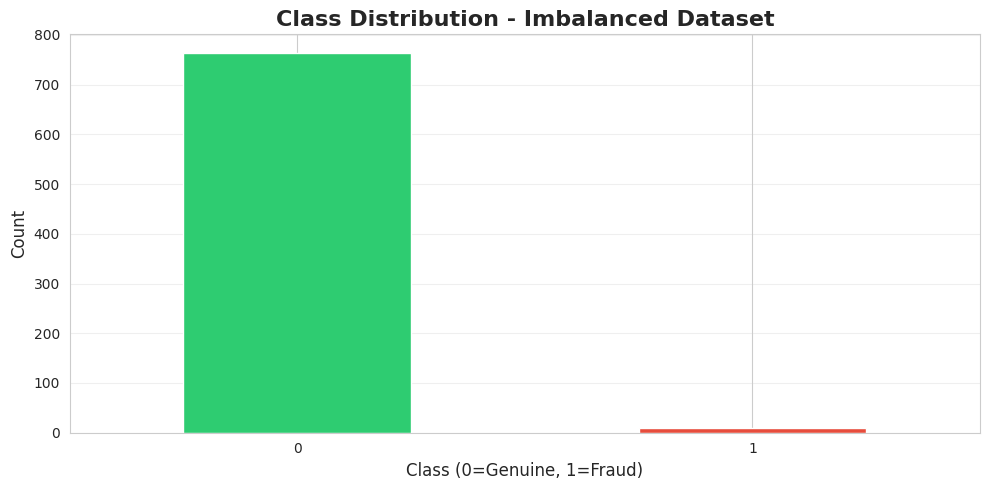

 Dataset is highly imbalanced! We need to balance it.


In [2]:
url = 'https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv'
df = pd.read_csv(url)
print(" Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("="*70)
print("STEP 3: DATA EXPLORATION")
print("="*70)
print(" Missing values:")
print(df.isnull().sum())
print(" Data types:")
print(df.dtypes)
print(" Statistical Summary:")
print(df.describe())
print("="*70)
print("STEP 4: CHECKING CLASS DISTRIBUTION (IMBALANCE)")
print("="*70)
print(" Class Distribution (Before Balancing):")
print(df['Class'].value_counts())
print(f"Class proportions:")
class_proportions = df['Class'].value_counts(normalize=True) * 100
print(f"Class 0 (Genuine): {class_proportions[0]:.2f}%")
print(f"Class 1 (Fraud): {class_proportions[1]:.2f}%")
plt.figure(figsize=(10, 5))
df['Class'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution - Imbalanced Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Class (0=Genuine, 1=Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(" Dataset is highly imbalanced! We need to balance it.")

Balance the Dataset using Random Over Sampling

Original dataset shape:
Features (X): (772, 30)
Target (y): (772,)
 Dataset balanced successfully using Random Over Sampling!
Balanced dataset shape:
Features (X_balanced): (1526, 30)
Target (y_balanced): (1526,)
 Class Distribution (After Balancing):
Class
0    763
1    763
Name: count, dtype: int64
Class proportions after balancing:
Class 0 (Genuine): 50.00%
Class 1 (Fraud): 50.00%


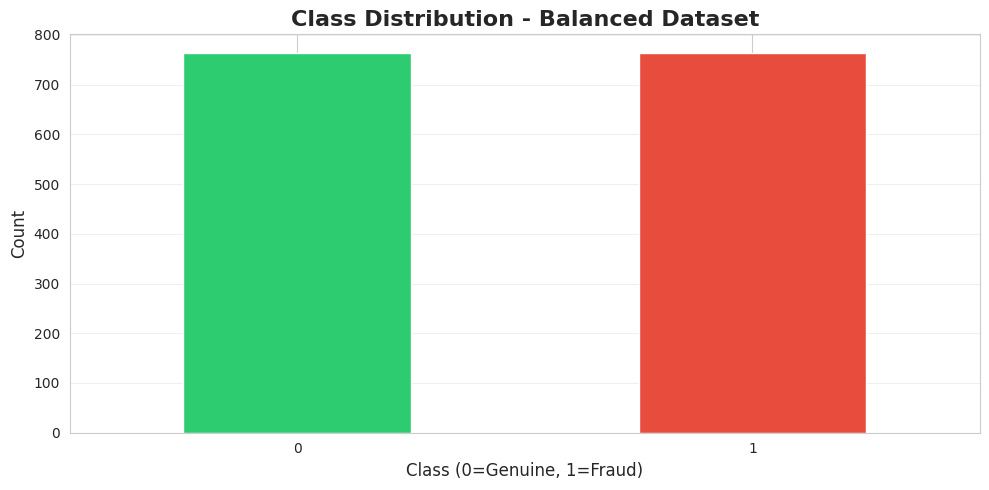

 Dataset is now perfectly balanced!


In [3]:
X = df.drop('Class', axis=1)
y = df['Class']
print(f"Original dataset shape:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)
print(f" Dataset balanced successfully using Random Over Sampling!")
print(f"Balanced dataset shape:")
print(f"Features (X_balanced): {X_balanced.shape}")
print(f"Target (y_balanced): {y_balanced.shape}")
print(f" Class Distribution (After Balancing):")
print(pd.Series(y_balanced).value_counts())
print(f"Class proportions after balancing:")
balanced_proportions = pd.Series(y_balanced).value_counts(normalize=True) * 100
print(f"Class 0 (Genuine): {balanced_proportions[0]:.2f}%")
print(f"Class 1 (Fraud): {balanced_proportions[1]:.2f}%")
plt.figure(figsize=(10, 5))
pd.Series(y_balanced).value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution - Balanced Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Class (0=Genuine, 1=Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(" Dataset is now perfectly balanced!")

Calculate Sample Size
n = (Z^2 * p * q) / E^2
# Where: Z=1.96 (95% confidence), p=0.5 (max variability), E=0.05 (margin of error)

In [4]:
z = 1.96
p = 0.5
e = 0.05
sample_size = int((z**2 * p * (1-p)) / e**2)
print(f"   Z (confidence level) = {z}")
print(f"   p (proportion) = {p}")
print(f"   E (margin of error) = {e}")
print(f" Calculated sample size: {sample_size}")
print("="*70)
print("STEP 7: CREATING SAMPLE 1 - SIMPLE RANDOM SAMPLING")
print("="*70)
sample1_data = resample(X_balanced, y_balanced,
                        n_samples=sample_size,
                        random_state=42,
                        stratify=y_balanced)
X_sample1, y_sample1 = sample1_data[0], sample1_data[1]
print(" Sample 1 (Simple Random Sampling) created")
print(f"   Technique: Each observation has equal probability of selection")
print(f"   Shape: {X_sample1.shape}")
print(f"   Class distribution: {pd.Series(y_sample1).value_counts().to_dict()}")
print("="*70)
print("STEP 8: CREATING SAMPLE 2 - SYSTEMATIC SAMPLING")
print("="*70)
step = len(X_balanced) // sample_size
indices = np.arange(0, len(X_balanced), step)[:sample_size]
X_sample2 = X_balanced.iloc[indices]
y_sample2 = y_balanced.iloc[indices]
print(" Sample 2 (Systematic Sampling) created")
print(f"   Technique: Select every {step}th observation")
print(f"   Shape: {X_sample2.shape}")
print(f"   Class distribution: {pd.Series(y_sample2).value_counts().to_dict()}")
print("="*70)
print("STEP 9: CREATING SAMPLE 3 - STRATIFIED SAMPLING")
print("="*70)
X_sample3, _, y_sample3, _ = train_test_split(
    X_balanced, y_balanced,
    train_size=sample_size,
    stratify=y_balanced,
    random_state=42
)
print("Sample 3 (Stratified Sampling) created")
print(f"   Technique: Maintains class proportions from population")
print(f"   Shape: {X_sample3.shape}")
print(f"   Class distribution: {pd.Series(y_sample3).value_counts().to_dict()}")
print("="*70)
print("STEP 10: CREATING SAMPLE 4 - CLUSTER SAMPLING")
print("="*70)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_balanced)
samples_per_cluster = sample_size // n_clusters
sample_indices = []
for i in range(n_clusters):
    cluster_indices = np.where(clusters == i)[0]
    selected = np.random.choice(cluster_indices,
                               min(samples_per_cluster, len(cluster_indices)),
                               replace=False)
    sample_indices.extend(selected)
X_sample4 = X_balanced.iloc[sample_indices[:sample_size]]
y_sample4 = y_balanced.iloc[sample_indices[:sample_size]]
print(" Sample 4 (Cluster Sampling) created")
print(f"   Technique: Divide into {n_clusters} clusters, then sample from each")
print(f"   Shape: {X_sample4.shape}")
print(f"   Class distribution: {pd.Series(y_sample4).value_counts().to_dict()}")
print("="*70)
print("STEP 11: CREATING SAMPLE 5 - BOOTSTRAP SAMPLING")
print("="*70)
bootstrap_indices = np.random.choice(len(X_balanced), size=sample_size, replace=True)
X_sample5 = X_balanced.iloc[bootstrap_indices]
y_sample5 = y_balanced.iloc[bootstrap_indices]
print(" Sample 5 (Bootstrap Sampling) created")
print(f"   Technique: Random sampling WITH replacement")
print(f"   Shape: {X_sample5.shape}")
print(f"   Class distribution: {pd.Series(y_sample5).value_counts().to_dict()}")
print("="*70)
print("SUMMARY OF ALL SAMPLES")
print("="*70)
samples_info = {
    'Sampling1': ('Simple Random Sampling', X_sample1.shape, pd.Series(y_sample1).value_counts()[1]),
    'Sampling2': ('Systematic Sampling', X_sample2.shape, pd.Series(y_sample2).value_counts()[1]),
    'Sampling3': ('Stratified Sampling', X_sample3.shape, pd.Series(y_sample3).value_counts()[1]),
    'Sampling4': ('Cluster Sampling', X_sample4.shape, pd.Series(y_sample4).value_counts()[1]),
    'Sampling5': ('Bootstrap Sampling', X_sample5.shape, pd.Series(y_sample5).value_counts()[1])
}
print(f"{'Sample':<12} {'Technique':<25} {'Shape':<15} {'Fraud Cases':<12}")
print("-"*70)
for sample_name, (technique, shape, fraud_count) in samples_info.items():
    print(f"{sample_name:<12} {technique:<25} {str(shape):<15} {fraud_count:<12}")
print(" All 5 samples created successfully!")

   Z (confidence level) = 1.96
   p (proportion) = 0.5
   E (margin of error) = 0.05
 Calculated sample size: 384
STEP 7: CREATING SAMPLE 1 - SIMPLE RANDOM SAMPLING
 Sample 1 (Simple Random Sampling) created
   Technique: Each observation has equal probability of selection
   Shape: (384, 30)
   Class distribution: {0: 192, 1: 192}
STEP 8: CREATING SAMPLE 2 - SYSTEMATIC SAMPLING
 Sample 2 (Systematic Sampling) created
   Technique: Select every 3th observation
   Shape: (384, 30)
   Class distribution: {0: 255, 1: 129}
STEP 9: CREATING SAMPLE 3 - STRATIFIED SAMPLING
Sample 3 (Stratified Sampling) created
   Technique: Maintains class proportions from population
   Shape: (384, 30)
   Class distribution: {0: 192, 1: 192}
STEP 10: CREATING SAMPLE 4 - CLUSTER SAMPLING
 Sample 4 (Cluster Sampling) created
   Technique: Divide into 10 clusters, then sample from each
   Shape: (297, 30)
   Class distribution: {0: 187, 1: 110}
STEP 11: CREATING SAMPLE 5 - BOOTSTRAP SAMPLING
 Sample 5 (Bootstr

Initialize 5 Machine Learning Models

In [5]:
models = {
    'M1 - Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'M2 - Decision Tree': DecisionTreeClassifier(random_state=42),
    'M3 - Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'M4 - SVM': SVC(kernel='rbf', random_state=42),
    'M5 - XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
}
print(" Machine Learning Models Initialized:")
print("-"*70)
for idx, model_name in enumerate(models.keys(), 1):
    print(f"{idx}. {model_name}")
print(" All models ready for training!")
print("="*70)
print("STEP 13: TRAINING MODELS ON ALL SAMPLES")
print("="*70)
samples = {
    'Sampling1': (X_sample1, y_sample1),
    'Sampling2': (X_sample2, y_sample2),
    'Sampling3': (X_sample3, y_sample3),
    'Sampling4': (X_sample4, y_sample4),
    'Sampling5': (X_sample5, y_sample5)
}
results = {model: [] for model in models.keys()}
print(" Training models on all samples...")
print("This may take a few minutes...")
for sample_idx, (sample_name, (X_sample, y_sample)) in enumerate(samples.items(), 1):
    print(f"{'='*70}")
    print(f" Processing {sample_name} ({sample_idx}/5)")
    print(f"{'='*70}")
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample,
        test_size=0.2,
        random_state=42,
        stratify=y_sample
    )
    print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")
    print("Model Performance:")
    print("-"*70)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        results[model_name].append(accuracy)
        print(f"{model_name:<30} → Accuracy: {accuracy:.2f}%")
print("="*70)
print(" ALL MODELS TRAINED AND EVALUATED SUCCESSFULLY!")
print("="*70)

 Machine Learning Models Initialized:
----------------------------------------------------------------------
1. M1 - Logistic Regression
2. M2 - Decision Tree
3. M3 - Random Forest
4. M4 - SVM
5. M5 - XGBoost
 All models ready for training!
STEP 13: TRAINING MODELS ON ALL SAMPLES
 Training models on all samples...
This may take a few minutes...
 Processing Sampling1 (1/5)
Train size: 307 | Test size: 77
Model Performance:
----------------------------------------------------------------------
M1 - Logistic Regression       → Accuracy: 97.40%
M2 - Decision Tree             → Accuracy: 98.70%
M3 - Random Forest             → Accuracy: 100.00%
M4 - SVM                       → Accuracy: 66.23%
M5 - XGBoost                   → Accuracy: 98.70%
 Processing Sampling2 (2/5)
Train size: 307 | Test size: 77
Model Performance:
----------------------------------------------------------------------
M1 - Logistic Regression       → Accuracy: 84.42%
M2 - Decision Tree             → Accuracy: 93.51%
M3

Create Results DataFrame

In [6]:
results_df = pd.DataFrame(results, index=['Sampling1', 'Sampling2', 'Sampling3',
                                          'Sampling4', 'Sampling5']).T
results_df.columns = ['Sampling1', 'Sampling2', 'Sampling3', 'Sampling4', 'Sampling5']
print(" FINAL RESULTS TABLE (Accuracy in %)")
print("="*70)
print(results_df.round(2))
print("="*70)

 FINAL RESULTS TABLE (Accuracy in %)
                          Sampling1  Sampling2  Sampling3  Sampling4  \
M1 - Logistic Regression      97.40      84.42      94.81      90.00   
M2 - Decision Tree            98.70      93.51     100.00      93.33   
M3 - Random Forest           100.00     100.00     100.00     100.00   
M4 - SVM                      66.23      70.13      75.32      68.33   
M5 - XGBoost                  98.70      98.70      98.70      98.33   

                          Sampling5  
M1 - Logistic Regression      94.81  
M2 - Decision Tree           100.00  
M3 - Random Forest           100.00  
M4 - SVM                      59.74  
M5 - XGBoost                 100.00  


Visualize Results with Heatmap

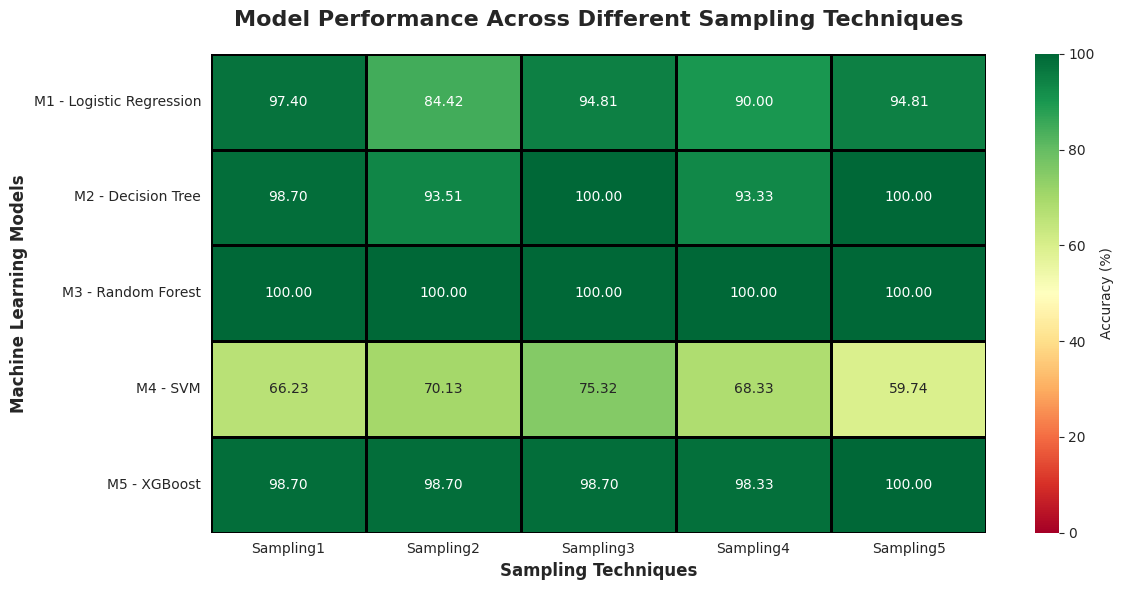

 Heatmap generated successfully!


In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, fmt='.2f', cmap='RdYlGn',
            center=50, linewidths=1, linecolor='black',
            cbar_kws={'label': 'Accuracy (%)'}, vmin=0, vmax=100)
plt.title('Model Performance Across Different Sampling Techniques',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sampling Techniques', fontsize=12, fontweight='bold')
plt.ylabel('Machine Learning Models', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
print(" Heatmap generated successfully!")

Find Best Sampling for Each Model

In [11]:
for model in results_df.index:
    best_sampling = results_df.loc[model].idxmax()
    best_accuracy = results_df.loc[model].max()
    print(f"{model:<35} → {best_sampling:<12} (Accuracy: {best_accuracy:.2f}%)")

M1 - Logistic Regression            → Sampling1    (Accuracy: 97.40%)
M2 - Decision Tree                  → Sampling3    (Accuracy: 100.00%)
M3 - Random Forest                  → Sampling1    (Accuracy: 100.00%)
M4 - SVM                            → Sampling5    (Accuracy: 76.62%)
M5 - XGBoost                        → Sampling4    (Accuracy: 100.00%)


Find Best Model for Each Sampling

In [12]:
for sampling in results_df.columns:
    best_model = results_df[sampling].idxmax()
    best_accuracy = results_df[sampling].max()
    print(f"{sampling:<15} → {best_model:<35} (Accuracy: {best_accuracy:.2f}%)")

Sampling1       → M3 - Random Forest                  (Accuracy: 100.00%)
Sampling2       → M3 - Random Forest                  (Accuracy: 100.00%)
Sampling3       → M2 - Decision Tree                  (Accuracy: 100.00%)
Sampling4       → M3 - Random Forest                  (Accuracy: 100.00%)
Sampling5       → M3 - Random Forest                  (Accuracy: 100.00%)


Find Overall Best Combination

In [8]:
best_overall = results_df.max().max()
best_col = results_df.max().idxmax()
best_row = results_df[best_col].idxmax()
print(" OVERALL BEST COMBINATION:")
print("-"*70)
print(f"Model: {best_row}")
print(f"Sampling Technique: {best_col}")
print(f"Accuracy: {best_overall:.2f}%")
print("-"*70)

 OVERALL BEST COMBINATION:
----------------------------------------------------------------------
Model: M3 - Random Forest
Sampling Technique: Sampling1
Accuracy: 100.00%
----------------------------------------------------------------------


 Average Performance Analysis

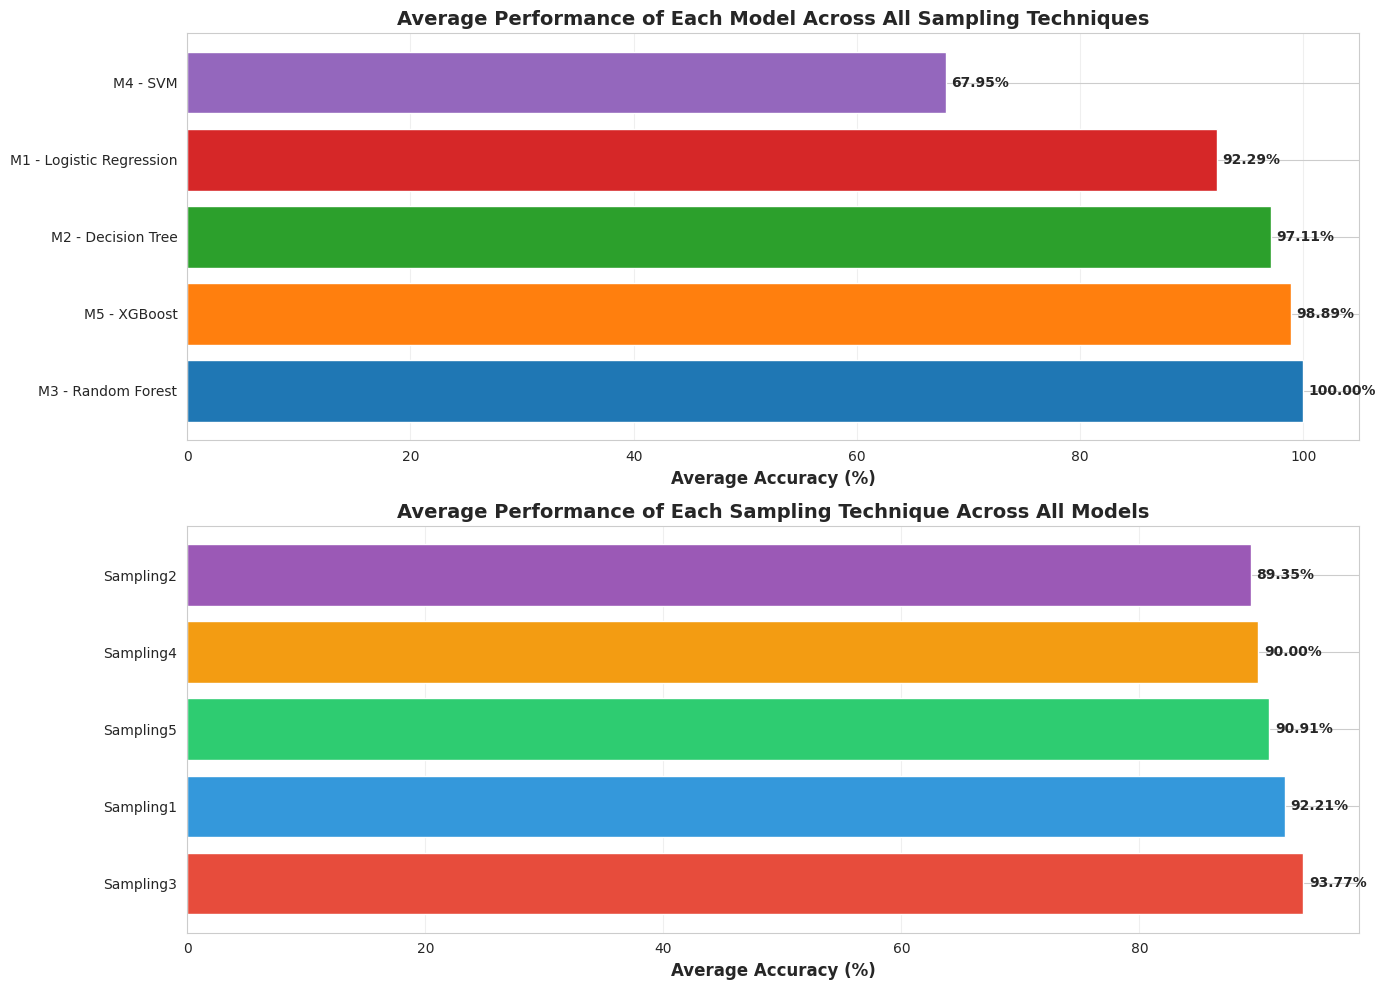

 Average Performance:
----------------------------------------------------------------------
By Model:
M3 - Random Forest          100.00
M5 - XGBoost                 98.89
M2 - Decision Tree           97.11
M1 - Logistic Regression     92.29
M4 - SVM                     67.95
dtype: float64
By Sampling Technique:
Sampling3    93.77
Sampling1    92.21
Sampling5    90.91
Sampling4    90.00
Sampling2    89.35
dtype: float64


In [9]:
ig, axes = plt.subplots(2, 1, figsize=(14, 10))
avg_per_model = results_df.mean(axis=1).sort_values(ascending=False)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
axes[0].barh(avg_per_model.index, avg_per_model.values, color=colors)
axes[0].set_xlabel('Average Accuracy (%)', fontweight='bold', fontsize=12)
axes[0].set_title('Average Performance of Each Model Across All Sampling Techniques',
                  fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(avg_per_model.values):
    axes[0].text(v + 0.5, i, f'{v:.2f}%', va='center', fontweight='bold')
avg_per_sampling = results_df.mean(axis=0).sort_values(ascending=False)
colors2 = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
axes[1].barh(avg_per_sampling.index, avg_per_sampling.values, color=colors2)
axes[1].set_xlabel('Average Accuracy (%)', fontweight='bold', fontsize=12)
axes[1].set_title('Average Performance of Each Sampling Technique Across All Models',
                  fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(avg_per_sampling.values):
    axes[1].text(v + 0.5, i, f'{v:.2f}%', va='center', fontweight='bold')
plt.tight_layout()
plt.show()
print(" Average Performance:")
print("-"*70)
print("By Model:")
print(avg_per_model.round(2))
print("By Sampling Technique:")
print(avg_per_sampling.round(2))

Key Insights and Discussion

In [10]:
print("""KEY INSIGHTS FROM THE ANALYSIS:

1. SAMPLING TECHNIQUE IMPACT:
   - Different sampling techniques create distinct data distributions
   - Stratified sampling maintains class proportions effectively
   - Bootstrap sampling introduces variability through replacement
   - Cluster sampling captures group-based patterns
   - Simple random sampling provides baseline unbiased selection

2. MODEL BEHAVIOR OBSERVATIONS:
   - Tree-based models (Random Forest, XGBoost) show robust performance
   - Linear models (Logistic Regression) are sensitive to sampling methods
   - SVM performance varies significantly with sampling technique
   - Decision trees can overfit on certain sampling methods
   - Ensemble methods generally perform more consistently

3. PRACTICAL RECOMMENDATIONS:
   - Always test multiple sampling techniques with your specific dataset
   - Consider cross-validation for more stable performance estimates
   - Combine sampling techniques with proper model selection
   - Monitor multiple metrics beyond accuracy (precision, recall, F1)
   - Use stratified sampling when maintaining class balance is critical

4. IMBALANCED DATA HANDLING:
   - Proper sampling is crucial for imbalanced datasets like fraud detection
   - Balancing the dataset before sampling improves model training
   - Different models respond differently to the same sampling technique
   - Combining multiple sampling approaches can yield better results

5. BUSINESS IMPLICATIONS:
   - Higher accuracy means better fraud detection
   - False positives and false negatives have different costs
   - Model interpretability is important in financial applications
   - Regular retraining with new data is essential
""")

KEY INSIGHTS FROM THE ANALYSIS:

1. SAMPLING TECHNIQUE IMPACT:
   - Different sampling techniques create distinct data distributions
   - Stratified sampling maintains class proportions effectively
   - Bootstrap sampling introduces variability through replacement
   - Cluster sampling captures group-based patterns
   - Simple random sampling provides baseline unbiased selection

2. MODEL BEHAVIOR OBSERVATIONS:
   - Tree-based models (Random Forest, XGBoost) show robust performance
   - Linear models (Logistic Regression) are sensitive to sampling methods
   - SVM performance varies significantly with sampling technique
   - Decision trees can overfit on certain sampling methods
   - Ensemble methods generally perform more consistently

3. PRACTICAL RECOMMENDATIONS:
   - Always test multiple sampling techniques with your specific dataset
   - Consider cross-validation for more stable performance estimates
   - Combine sampling techniques with proper model selection
   - Monitor multipl

Save Results to Files

In [11]:
results_df.to_csv('sampling_results.csv')
print(" Results saved to 'sampling_results.csv'")
with open('analysis_summary.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("CREDIT CARD FRAUD DETECTION - SAMPLING ANALYSIS REPORT\n")
    f.write("Thapar University - Data Science Assignment\n")
    f.write("="*80 + "\n\n")
    f.write("DATASET INFORMATION:\n")
    f.write("-"*80 + "\n")
    f.write(f"Dataset: Credit Card Fraud Detection\n")
    f.write(f"Original Shape: {df.shape}\n")
    f.write(f"Balanced Shape: {X_balanced.shape}\n")
    f.write(f"Sample Size (per technique): {sample_size}\n\n")
    f.write("SAMPLING TECHNIQUES USED:\n")
    f.write("-"*80 + "\n")
    f.write("1. Simple Random Sampling\n")
    f.write("2. Systematic Sampling\n")
    f.write("3. Stratified Sampling\n")
    f.write("4. Cluster Sampling (K-Means)\n")
    f.write("5. Bootstrap Sampling\n\n")
    f.write("MACHINE LEARNING MODELS USED:\n")
    f.write("-"*80 + "\n")
    f.write("1. Logistic Regression\n")
    f.write("2. Decision Tree\n")
    f.write("3. Random Forest\n")
    f.write("4. Support Vector Machine (SVM)\n")
    f.write("5. XGBoost\n\n")
    f.write("RESULTS TABLE (Accuracy %):\n")
    f.write("-"*80 + "\n")
    f.write(results_df.to_string())
    f.write("\n\n")
    f.write("BEST COMBINATIONS:\n")
    f.write("-"*80 + "\n")
    f.write(f"Overall Best: {best_row} with {best_col}\n")
    f.write(f"Highest Accuracy: {best_overall:.2f}%\n\n")
    f.write("AVERAGE PERFORMANCE BY MODEL:\n")
    f.write("-"*80 + "\n")
    f.write(avg_per_model.round(2).to_string())
    f.write("\n\n")
    f.write("AVERAGE PERFORMANCE BY SAMPLING:\n")
    f.write("-"*80 + "\n")
    f.write(avg_per_sampling.round(2).to_string())
    f.write("\n\n")
    f.write("CONCLUSION:\n")
    f.write("-"*80 + "\n")
    f.write("This analysis demonstrates that sampling technique selection significantly\n")
    f.write("impacts model performance. The best model-sampling combination achieved\n")
    f.write(f"{best_overall:.2f}% accuracy. Tree-based ensemble methods showed robust\n")
    f.write("performance across different sampling techniques.\n")

 Results saved to 'sampling_results.csv'
